## Mineração de *dados*

*Luiz Fernando Puttow Southier*<br>
*UTFPR-PB*

## Classificação


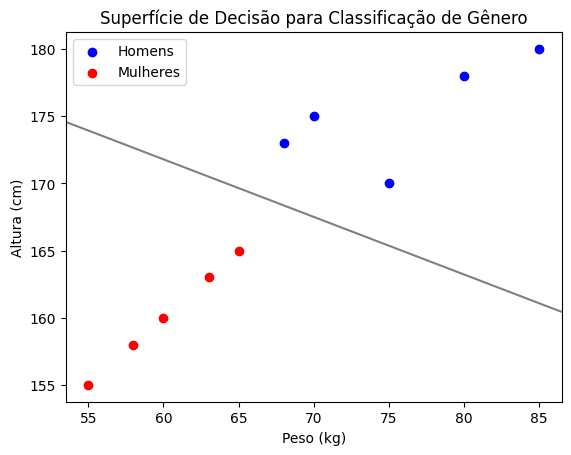

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC

# Dados de exemplo (Peso, Altura, Gênero)
homens = np.array([(70, 175), (85, 180), (75, 170), (80, 178), (68, 173)])
mulheres = np.array([(60, 160), (55, 155), (65, 165), (58, 158), (63, 163)])

X = np.vstack((homens, mulheres))
y = np.hstack((np.zeros(len(homens)), np.ones(len(mulheres))))

# Treinando o classificador SVC
clf = SVC(kernel='linear')
clf.fit(X, y)

# Plotando os pontos de dados
plt.scatter(homens[:, 0], homens[:, 1], color='blue', label='Homens')
plt.scatter(mulheres[:, 0], mulheres[:, 1], color='red', label='Mulheres')

# Criando a superfície de decisão
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()
xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50),
                     np.linspace(ylim[0], ylim[1], 50))
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contour(xx, yy, Z, colors='k', levels=[0], alpha=0.5,
            linestyles=['-'])

plt.xlabel('Peso (kg)')
plt.ylabel('Altura (cm)')
plt.title('Superfície de Decisão para Classificação de Gênero')
plt.legend()
plt.show()

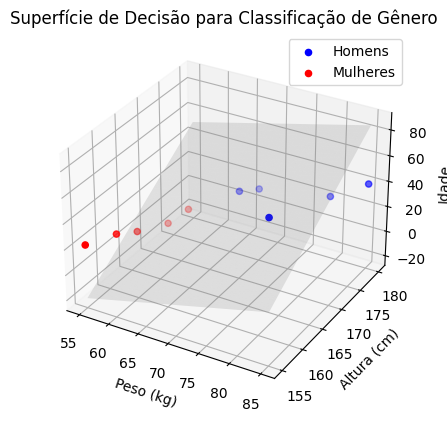

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.svm import SVC

# Dados de exemplo (Peso, Altura, Idade, Gênero)
dados = np.array([
    [70, 175, 30, 'Homem'],
    [60, 160, 25, 'Mulher'],
    [85, 180, 40, 'Homem'],
    [55, 155, 22, 'Mulher'],
    [75, 170, 28, 'Homem'],
    [65, 165, 35, 'Mulher'],
    [80, 178, 29, 'Homem'],
    [58, 158, 26, 'Mulher'],
    [68, 173, 31, 'Homem'],
    [63, 163, 27, 'Mulher']
])

# Dividindo os dados em atributos (Peso, Altura, Idade) e rótulos (Gênero)
X = dados[:, :3].astype(float)
y = dados[:, 3]

# Treinando o classificador SVC
clf = SVC(kernel='linear')
clf.fit(X, y)

# Plotando os pontos de dados
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[y == 'Homem', 0], X[y == 'Homem', 1], X[y == 'Homem', 2], color='blue', label='Homens')
ax.scatter(X[y == 'Mulher', 0], X[y == 'Mulher', 1], X[y == 'Mulher', 2], color='red', label='Mulheres')

# Criando a superfície de decisão
xx, yy = np.meshgrid(np.linspace(X[:, 0].min(), X[:, 0].max(), 50),
                     np.linspace(X[:, 1].min(), X[:, 1].max(), 50))
zz = (-clf.intercept_[0] - clf.coef_[0][0] * xx - clf.coef_[0][1] * yy) / clf.coef_[0][2]
ax.plot_surface(xx, yy, zz, alpha=0.2, color='gray')

ax.set_xlabel('Peso (kg)')
ax.set_ylabel('Altura (cm)')
ax.set_zlabel('Idade')
ax.set_title('Superfície de Decisão para Classificação de Gênero')
ax.legend()
plt.show()

Dados iris

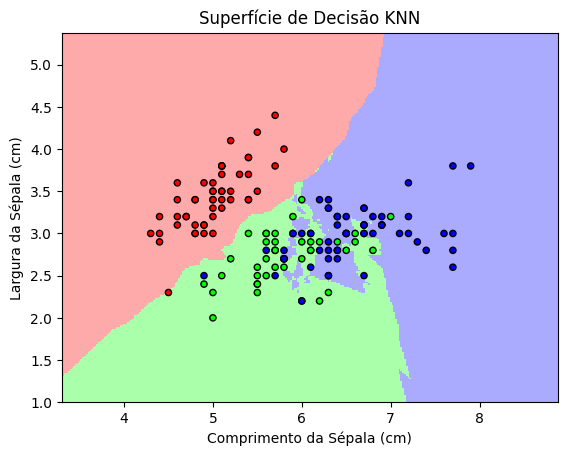

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from matplotlib.colors import ListedColormap

# Carregar o conjunto de dados Iris
iris = load_iris()
X = iris.data[:, :2]  # Usando apenas as duas primeiras características
y = iris.target

# Criar um classificador KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X, y)

# Preparar a malha para a superfície de decisão
h = .02  # Passo da grade
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Fazer as predições para cada ponto na malha
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Criar mapa de cores para as áreas de decisão
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

# Plotar a superfície de decisão
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plotar os pontos de treinamento
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold,
            edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("Superfície de Decisão KNN")
plt.xlabel('Comprimento da Sépala (cm)')
plt.ylabel('Largura da Sépala (cm)')

plt.show()

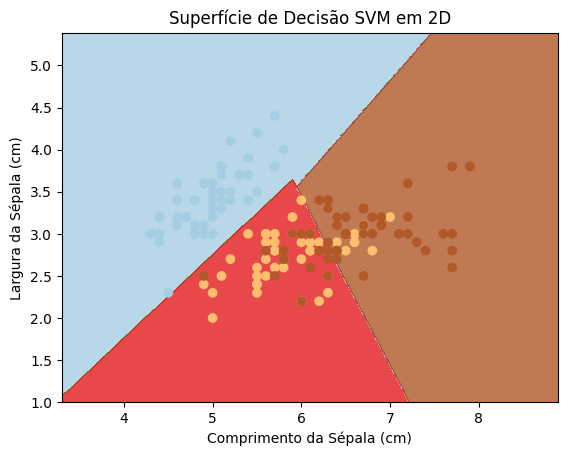

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.svm import SVC

# Carregar o conjunto de dados Iris
iris = load_iris()
X = iris.data[:, :2]  # Usando as duas primeiras características
y = iris.target

# Criar um classificador SVM
svm = SVC(kernel='linear')
svm.fit(X, y)

# Criar a malha para a superfície de decisão
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))
Z = svm.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plotar a superfície de decisão
plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.Paired)

# Plotar os pontos de dados
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
plt.xlabel('Comprimento da Sépala (cm)')
plt.ylabel('Largura da Sépala (cm)')
plt.title('Superfície de Decisão SVM em 2D')
plt.show()

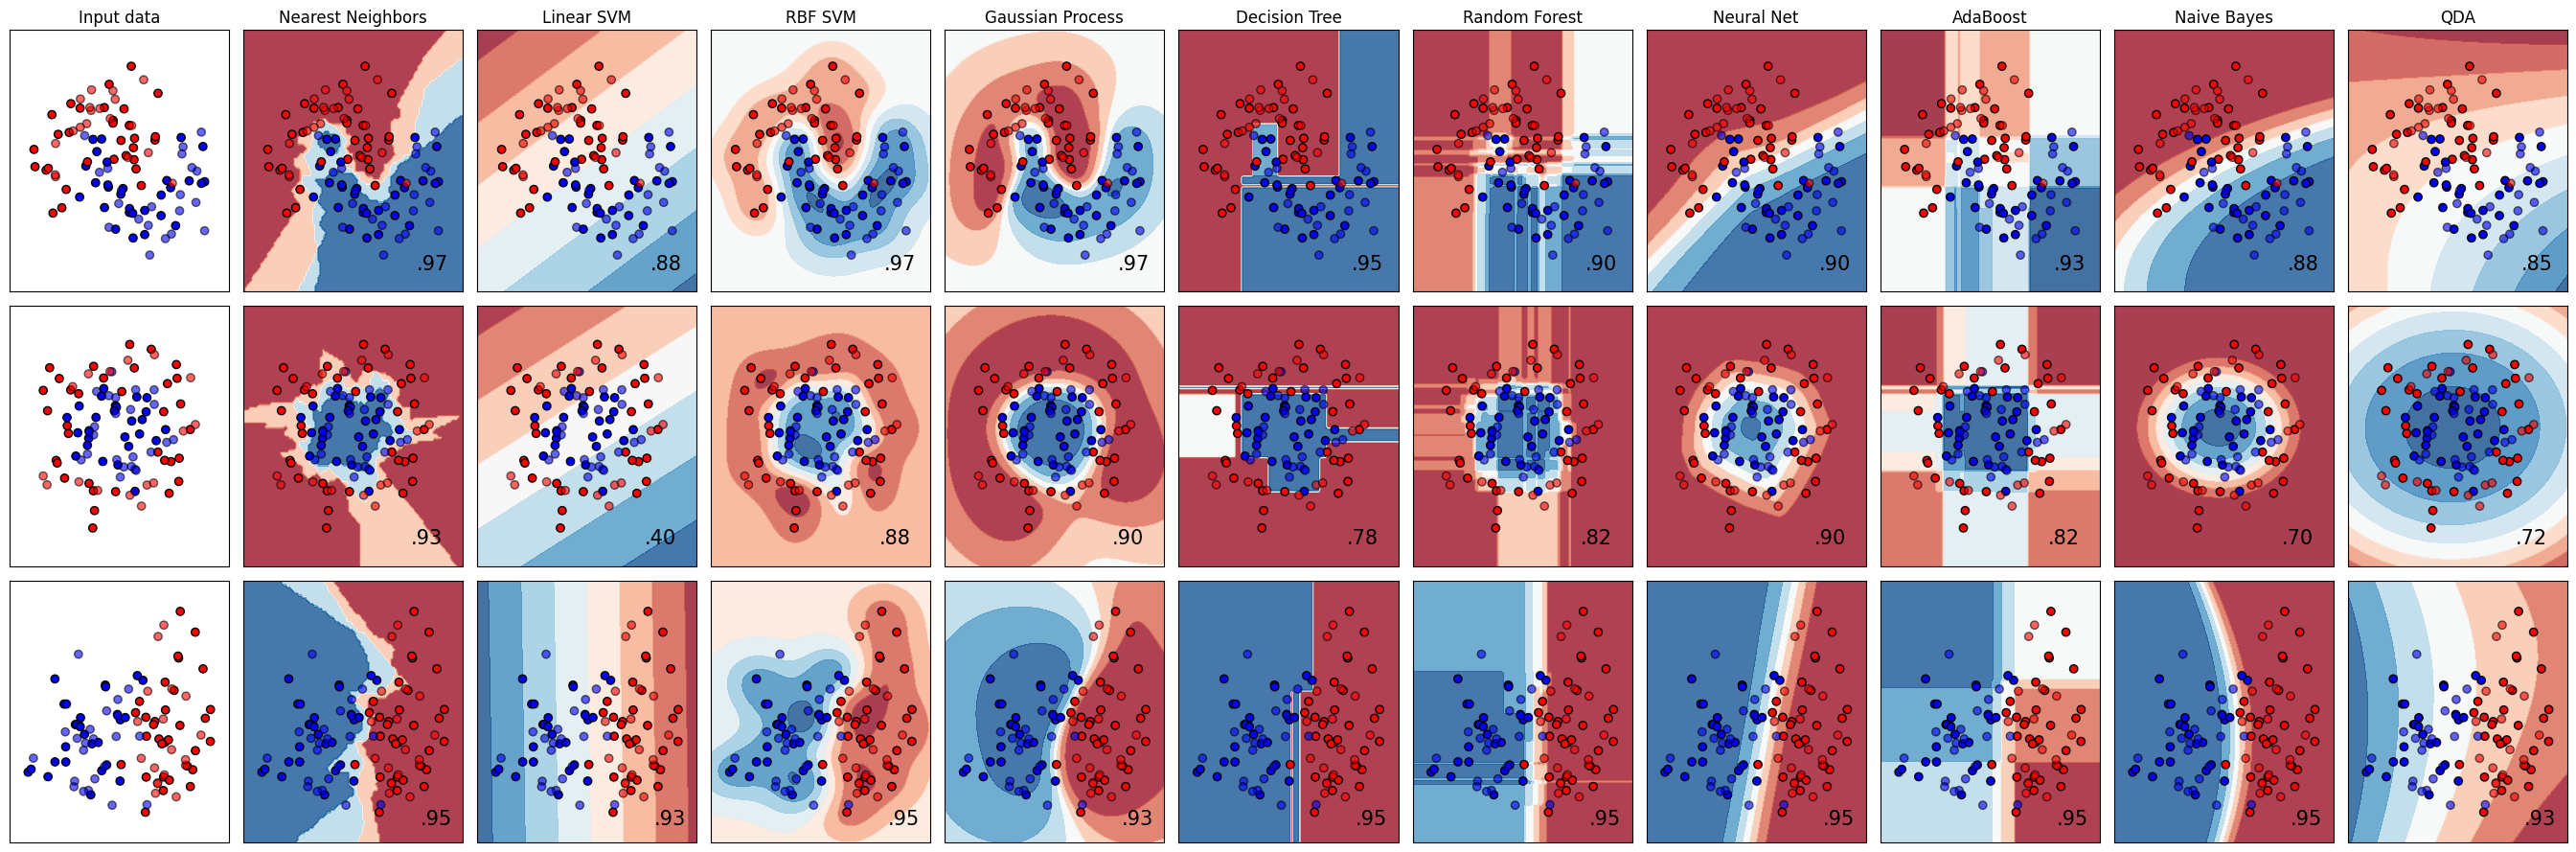

In [7]:
# Code source: Gaël Varoquaux
#              Andreas Müller
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause

import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap

from sklearn.datasets import make_circles, make_classification, make_moons
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

names = [
    "Nearest Neighbors",
    "Linear SVM",
    "RBF SVM",
    "Gaussian Process",
    "Decision Tree",
    "Random Forest",
    "Neural Net",
    "AdaBoost",
    "Naive Bayes",
    "QDA",
]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis(),
]

X, y = make_classification(
    n_features=2, n_redundant=0, n_informative=2, random_state=1, n_clusters_per_class=1
)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

datasets = [
    make_moons(noise=0.3, random_state=0),
    make_circles(noise=0.2, factor=0.5, random_state=1),
    linearly_separable,
]

figure = plt.figure(figsize=(27, 9))
i = 1
# iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    X, y = ds
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.4, random_state=42
    )

    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(["#FF0000", "#0000FF"])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    if ds_cnt == 0:
        ax.set_title("Input data")
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="k")
    # Plot the testing points
    ax.scatter(
        X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6, edgecolors="k"
    )
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)

        clf = make_pipeline(StandardScaler(), clf)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)
        DecisionBoundaryDisplay.from_estimator(
            clf, X, cmap=cm, alpha=0.8, ax=ax, eps=0.5
        )

        # Plot the training points
        ax.scatter(
            X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="k"
        )
        # Plot the testing points
        ax.scatter(
            X_test[:, 0],
            X_test[:, 1],
            c=y_test,
            cmap=cm_bright,
            edgecolors="k",
            alpha=0.6,
        )

        ax.set_xlim(x_min, x_max)
        ax.set_ylim(y_min, y_max)
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name)
        ax.text(
            x_max - 0.3,
            y_min + 0.3,
            ("%.2f" % score).lstrip("0"),
            size=15,
            horizontalalignment="right",
        )
        i += 1

plt.tight_layout()
plt.show()